In [10]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
%matplotlib inline

In [11]:
tf.__version__

'2.8.0'

In [12]:
defn = pd.read_csv('https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv')
defn=defn. iloc[::-1]
defn.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98


In [13]:
defn.tail()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35


In [14]:
defn.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [15]:
defn.shape

(2035, 8)

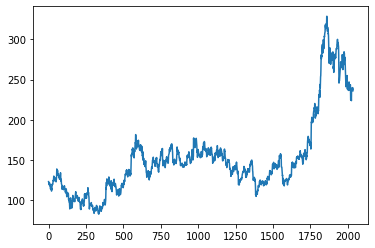

In [16]:
defn_high=defn.reset_index()['High']
plt.plot(defn_high)

In [17]:
sclr = MinMaxScaler(feature_range = (0,1))
defn_high = sclr.fit_transform(np.array(defn_high).reshape(-1,1))

In [18]:
defn_high.shape

(2035, 1)

In [19]:
defn_high

array([[0.16344786],
       [0.15938199],
       [0.15917869],
       ...,
       [0.6391543 ],
       [0.62614353],
       [0.62268754]])

In [20]:
trainsz = int(len(defn_high) * 0.75)
testsz = len(defn_high) - trainsz
traindata, testdata = defn_high[0:trainsz,:], defn_high[trainsz:len(defn_high),:1]

In [21]:
trainsz,testsz

(1526, 509)

In [22]:
def create_dataset(dataset, tstep = 1):
    dX, dY = [], []
    for i in range(len(dataset) - tstep - 1):
        v = dataset[i:(i+tstep), 0]
        dX.append(v)
        dY.append(dataset[i+tstep, 0])
    return np.array(dX), np.array(dY)

    
tstep = 100
xtrainer, ytrainer = create_dataset(traindata, tstep)
xtester, ytester = create_dataset(testdata, tstep)

In [23]:
xtrainer = xtrainer.reshape(xtrainer.shape[0], xtrainer.shape[1], 1)
xtester = xtester.reshape(xtester.shape[0], xtester.shape[1], 1)


print(xtrainer.shape), print(ytrainer.shape)

(1425, 100, 1)
(1425,)


(None, None)

In [24]:
print(xtester.shape), print(ytester.shape)

(408, 100, 1)
(408,)


(None, None)

In [25]:
mdl = Sequential()
mdl.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
mdl.add(LSTM(50, return_sequences = True))
mdl.add(LSTM(50))
mdl.add(Dense(1))
mdl.compile(loss = 'mean_squared_error', optimizer = 'adam')


mdl.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [26]:
mdl.fit(xtrainer, ytrainer, validation_data = (xtester, ytester), epochs = 100, batch_size = 64, verbose = 1)

Epoch 1/100
23/23 [==============================] - 33s 635ms/step - loss: 0.0123 - val_loss: 0.0580
Epoch 2/100
23/23 [==============================] - 12s 536ms/step - loss: 0.0021 - val_loss: 0.0076
Epoch 3/100
23/23 [==============================] - 11s 502ms/step - loss: 8.5443e-04 - val_loss: 0.0037
Epoch 4/100
23/23 [==============================] - 12s 546ms/step - loss: 7.7577e-04 - val_loss: 0.0052
Epoch 5/100
23/23 [==============================] - 12s 531ms/step - loss: 7.5021e-04 - val_loss: 0.0041
Epoch 6/100
23/23 [==============================] - 13s 552ms/step - loss: 7.0868e-04 - val_loss: 0.0032
Epoch 7/100
23/23 [==============================] - 12s 528ms/step - loss: 7.0836e-04 - val_loss: 0.0026
Epoch 8/100
23/23 [==============================] - 11s 499ms/step - loss: 6.7628e-04 - val_loss: 0.0065
Epoch 9/100
23/23 [==============================] - 12s 513ms/step - loss: 6.9266e-04 - val_loss: 0.0046
Epoch 10/100
23/23 [==============================] - 

23/23 [==============================] - 13s 553ms/step - loss: 1.4884e-04 - val_loss: 0.0013
Epoch 78/100
23/23 [==============================] - 13s 572ms/step - loss: 1.3391e-04 - val_loss: 0.0017
Epoch 79/100
23/23 [==============================] - 12s 545ms/step - loss: 1.1808e-04 - val_loss: 0.0037
Epoch 80/100
23/23 [==============================] - 12s 532ms/step - loss: 1.2406e-04 - val_loss: 0.0031
Epoch 81/100
23/23 [==============================] - 11s 498ms/step - loss: 1.3136e-04 - val_loss: 0.0016
Epoch 82/100
23/23 [==============================] - 12s 542ms/step - loss: 1.1744e-04 - val_loss: 0.0022
Epoch 83/100
23/23 [==============================] - 12s 535ms/step - loss: 1.2204e-04 - val_loss: 0.0023
Epoch 84/100
23/23 [==============================] - 12s 508ms/step - loss: 1.1556e-04 - val_loss: 0.0013
Epoch 85/100
23/23 [==============================] - 12s 542ms/step - loss: 1.2860e-04 - val_loss: 0.0033
Epoch 86/100
23/23 [==============================

In [27]:
trpd = mdl.predict(xtrainer)
tpd = mdl.predict(xtester)

In [28]:
trpd = sclr.inverse_transform(trpd)
tpd = sclr.inverse_transform(tpd)

In [29]:
math.sqrt(mean_squared_error(ytrainer, trpd))

137.13175623235708

In [30]:

math.sqrt(mean_squared_error(ytester, tpd))

228.47381819017272

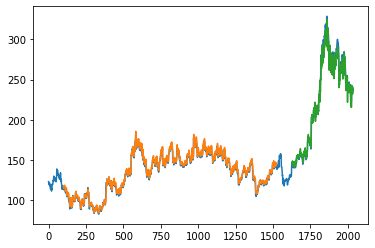

Green indicates the predicted data
Blue indicates the complete data
Orange indicates the trained data


In [32]:
lb = 100
trpdPlot = np.empty_like(defn_high)
trpdPlot[:,:] = np.nan
trpdPlot[lb:len(trpd) + lb, :] = trpd

tpdPlot = np.empty_like(defn_high)
tpdPlot[:,:] = np.nan
tpdPlot[len(trpd) + (lb * 2)+1:len(defn_high) - 1, :] = tpd

plt.plot(sclr.inverse_transform(defn_high))
plt.plot(trpdPlot)
plt.plot(tpdPlot)
plt.show()

print("Green indicates the predicted data")
print("Blue indicates the complete data")
print("Orange indicates the trained data")

In [33]:
len(testdata), xtester.shape

(509, (408, 100, 1))

In [34]:
xinput = testdata[409:].reshape(1,-1)
xinput.shape

(1, 100)

In [35]:
tmpinput = list(xinput)
temp_input = tmpinput[0].tolist()

lstoutput=[]
nossteps=100
nextNumberOfDays = 28
i=0

while(i<nextNumberOfDays):
    
    if(len(temp_input)>100):
        xinput=np.array(temp_input[1:])
        print("{} day input {}".format(i,xinput))
        xinput=xinput.reshape(1,-1)
        xinput = xinput.reshape((1, nossteps, 1))
        yhat = mdl.predict(xinput, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lstoutput.extend(yhat.tolist())
        i=i+1
    else:
        xinput = xinput.reshape((1, nossteps,1))
        yhat = mdl.predict(xinput, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lstoutput.extend(yhat.tolist())
        i=i+1
    

print(lstoutput)

[0.6156677]
101
1 day input [0.86013417 0.85464525 0.84448059 0.8072779  0.71843871 0.66192316
 0.67696686 0.67554381 0.67310429 0.68428542 0.68936776 0.70217524
 0.71803212 0.72941655 0.73144948 0.74486684 0.76926205 0.75991055
 0.74242732 0.73958122 0.74771295 0.75991055 0.7584875  0.76621264
 0.75462492 0.76316324 0.79670665 0.80585485 0.7889815  0.78003659
 0.73978451 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492
 0.75401504 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706
 0.77434438 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038
 0.71193332 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423
 0.67656028 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992
 0.69993901 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723
 0.63854442 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507
 0.66761537 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819
 0.62980281 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995
 0.57816629 0.57613336 0.61943484 0

8 day output [[0.55203927]]
9 day input [0.67310429 0.68428542 0.68936776 0.70217524 0.71803212 0.72941655
 0.73144948 0.74486684 0.76926205 0.75991055 0.74242732 0.73958122
 0.74771295 0.75991055 0.7584875  0.76621264 0.75462492 0.76316324
 0.79670665 0.80585485 0.7889815  0.78003659 0.73978451 0.73002643
 0.73490547 0.74872942 0.75991055 0.75462492 0.75401504 0.76174019
 0.7737345  0.82008538 0.80585485 0.81154706 0.77434438 0.78633869
 0.79284407 0.78328929 0.77109169 0.74385038 0.71193332 0.68733482
 0.67818662 0.65257166 0.64301687 0.65643423 0.67656028 0.67371417
 0.65114861 0.65521447 0.66761537 0.67838992 0.69993901 0.63122586
 0.63508843 0.64098394 0.64545639 0.64118723 0.63854442 0.63081927
 0.62472047 0.6330555  0.64728603 0.6574507  0.66761537 0.66720878
 0.64159382 0.62776987 0.63651149 0.63630819 0.62980281 0.62817646
 0.63813783 0.65358813 0.63183574 0.57653995 0.57816629 0.57613336
 0.61943484 0.57979264 0.57288067 0.62573694 0.63102257 0.6361049
 0.62776987 0.6269567  

16 day output [[0.5429579]]
17 day input [0.76926205 0.75991055 0.74242732 0.73958122 0.74771295 0.75991055
 0.7584875  0.76621264 0.75462492 0.76316324 0.79670665 0.80585485
 0.7889815  0.78003659 0.73978451 0.73002643 0.73490547 0.74872942
 0.75991055 0.75462492 0.75401504 0.76174019 0.7737345  0.82008538
 0.80585485 0.81154706 0.77434438 0.78633869 0.79284407 0.78328929
 0.77109169 0.74385038 0.71193332 0.68733482 0.67818662 0.65257166
 0.64301687 0.65643423 0.67656028 0.67371417 0.65114861 0.65521447
 0.66761537 0.67838992 0.69993901 0.63122586 0.63508843 0.64098394
 0.64545639 0.64118723 0.63854442 0.63081927 0.62472047 0.6330555
 0.64728603 0.6574507  0.66761537 0.66720878 0.64159382 0.62776987
 0.63651149 0.63630819 0.62980281 0.62817646 0.63813783 0.65358813
 0.63183574 0.57653995 0.57816629 0.57613336 0.61943484 0.57979264
 0.57288067 0.62573694 0.63102257 0.6361049  0.62776987 0.6269567
 0.63590161 0.62594023 0.6391543  0.62614353 0.62268754 0.6156677
 0.60179669 0.58737308 0

25 day output [[0.5319753]]
26 day input [0.76316324 0.79670665 0.80585485 0.7889815  0.78003659 0.73978451
 0.73002643 0.73490547 0.74872942 0.75991055 0.75462492 0.75401504
 0.76174019 0.7737345  0.82008538 0.80585485 0.81154706 0.77434438
 0.78633869 0.79284407 0.78328929 0.77109169 0.74385038 0.71193332
 0.68733482 0.67818662 0.65257166 0.64301687 0.65643423 0.67656028
 0.67371417 0.65114861 0.65521447 0.66761537 0.67838992 0.69993901
 0.63122586 0.63508843 0.64098394 0.64545639 0.64118723 0.63854442
 0.63081927 0.62472047 0.6330555  0.64728603 0.6574507  0.66761537
 0.66720878 0.64159382 0.62776987 0.63651149 0.63630819 0.62980281
 0.62817646 0.63813783 0.65358813 0.63183574 0.57653995 0.57816629
 0.57613336 0.61943484 0.57979264 0.57288067 0.62573694 0.63102257
 0.6361049  0.62776987 0.6269567  0.63590161 0.62594023 0.6391543
 0.62614353 0.62268754 0.6156677  0.60179669 0.58737308 0.57564551
 0.56717718 0.56121546 0.55702055 0.55408227 0.55203927 0.55060011
 0.54951799 0.5485934 

In [36]:
dnew = np.arange(1,101)
dpred = np.arange(101,129)

In [37]:
dnew.shape

(100,)

In [38]:
dpred.shape

(28,)

In [39]:
defn3 = defn_high.tolist()
defn3.extend(lstoutput)

len(defn_high)

2035

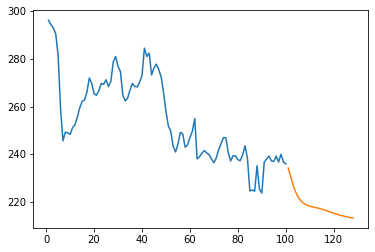

In [40]:
plt.plot(dnew, sclr.inverse_transform(defn_high[1935:]))
plt.plot(dpred, sclr.inverse_transform(lstoutput))

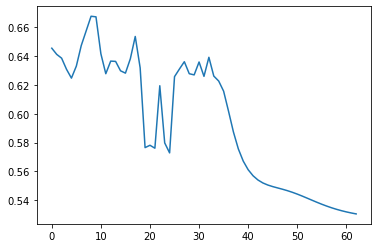

In [41]:
defn3=defn_high.tolist()
defn3.extend(lstoutput)
plt.plot(defn3[2000:])

In [42]:
defn3=sclr.inverse_transform(defn3).tolist()

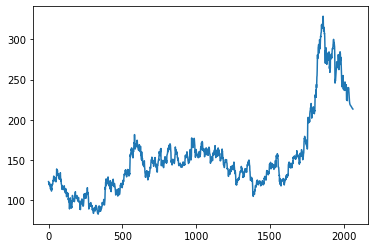

In [43]:
plt.plot(defn3)

CONCLUSION

We have successfully completed a project on stock market prediction and forecasting using stacked LSTM.